# Apartat (B): Comparativa de models (4pts)

Correct classification Logistic              0.5 % of the data:  0.8133333333333334
Correct classification SVM                   0.5 % of the data:  0.7866666666666666
Correct classification Random Forest         0.5 % of the data:  0.7866666666666666
Correct classification Gaussian Naive Bayes  0.5 % of the data:  0.8133333333333334
Correct classification KNN                   0.5 % of the data:  0.7733333333333333
Correct classification KN Centroids          0.5 % of the data:  0.84 

Correct classification Logistic              0.7 % of the data:  0.8222222222222222
Correct classification SVM                   0.7 % of the data:  0.7555555555555555
Correct classification Random Forest         0.7 % of the data:  0.8
Correct classification Gaussian Naive Bayes  0.7 % of the data:  0.8222222222222222
Correct classification KNN                   0.7 % of the data:  0.7777777777777778
Correct classification KN Centroids          0.7 % of the data:  0.8222222222222222 

Correct classific

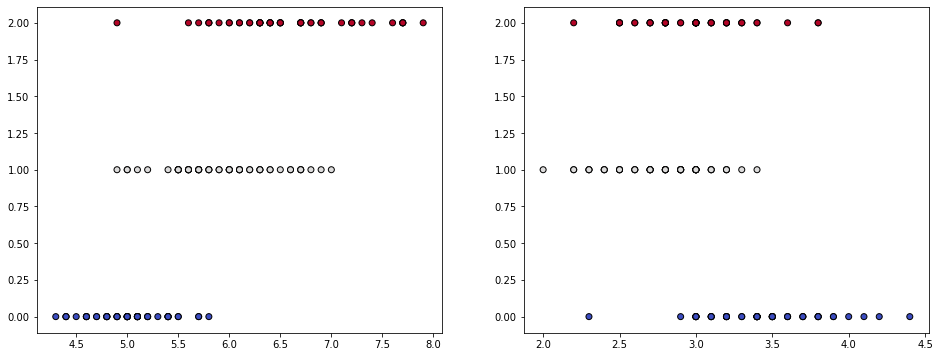

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

# import some data to play with
iris = datasets.load_iris()

# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

n_classes = 3
    
fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')

particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic             ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el regresor svm
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM                  ", part, "% of the data: ", svc.score(x_v, y_v))
    
    #Creem el regresor de Random Forest
    rf = RandomForestClassifier(max_depth=2, random_state=0)

    # l'entrenem
    rf.fit(x_t, y_t)

    print ("Correct classification Random Forest        ", part, "% of the data: ", rf.score(x_v, y_v))
    
    #Creem el regresor de Naive Bayes Gaussià
    GNB = GaussianNB()

    # l'entrenem
    GNB.fit(x_t, y_t)

    print ("Correct classification Gaussian Naive Bayes ", part, "% of the data: ", GNB.score(x_v, y_v))
    
    #Creem el regresor KNN
    KNN = KNeighborsClassifier()

    # l'entrenem
    KNN.fit(x_t, y_t)

    print ("Correct classification KNN                  ", part, "% of the data: ", KNN.score(x_v, y_v))
    
    #Creem el regresor KN Centroids
    KNC = NearestCentroid()

    # l'entrenem
    KNC.fit(x_t, y_t)

    print ("Correct classification KN Centroids         ", part, "% of the data: ", KNC.score(x_v, y_v), "\n")

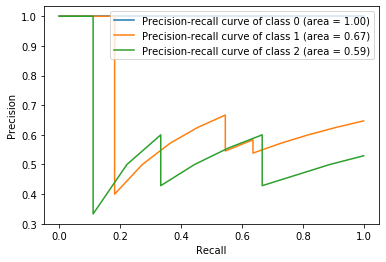

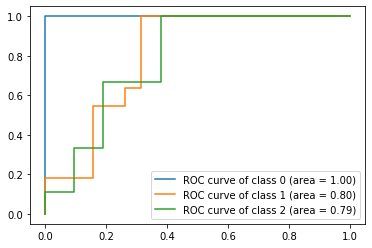

In [3]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
threshold = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], threshold[i] = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(C=1.0, gamma=0.7, degree=3, case = 0):

    # import some data to play with
    iris = datasets.load_iris()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = iris.data[:, :2]
    y = iris.target

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel', 
              'Random Forest',
              'Gaussian Naive Bayes',
              'KNN',
              'KN Centroids',
              'Logistic Regression')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C),
              RandomForestClassifier(max_depth=2, random_state=0),
              GaussianNB(),
              KNeighborsClassifier(),
              NearestCentroid(),
              LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001))
    
    if case == 0:
        models = (clf.fit(X, y) for clf in models)
    else:
        models = (clf.fit(x_t, y_t) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(5, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    if case == 0:
        X0, X1 = X[:, 0], X[:, 1]
    else:
        X0, X1 = x_v[:, 0], x_v[:, 1]
        
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        if case == 0:
            ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        else:
            ax.scatter(X0, X1, c=y_v, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()

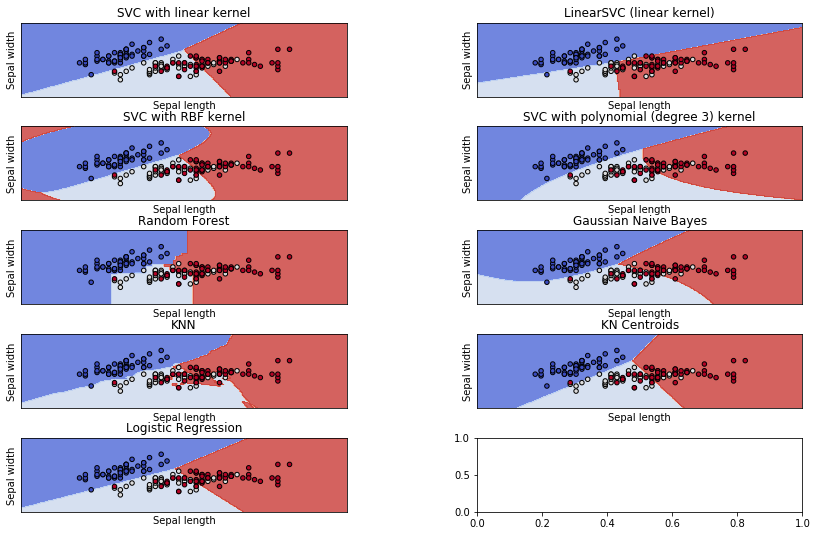

In [6]:
# S'ha utilitzant X i y tant per entrenar com per validar
show_C_effect(C=0.1)

Podeu provar quin efecte té diferents valors de regularització per aquest petit exemple ( C=0.0001 to 1000..). També podeu veure com afecta els valors de degree i gamma. 

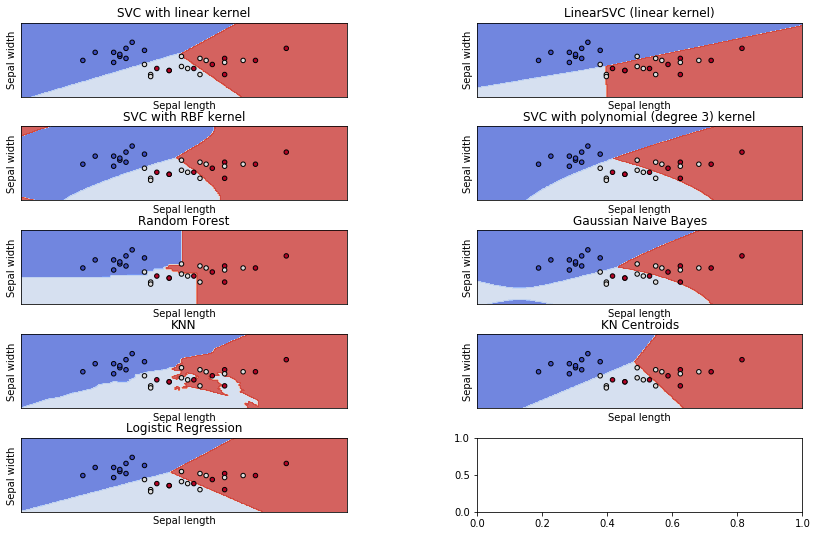

In [7]:
# S'ha utilitzant x_t i y_t per entrenar i x_v i y_v per validar
show_C_effect(C=0.1, case = 1)